In [1]:
%load_ext autoreload
%autoreload 2
import sys, os
import random
import numpy as np
from tqdm.notebook import tqdm
from tabulate import tabulate
from omnibelt import load_json, save_json, load_yaml, save_yaml
from pathlib import Path
from collections import Counter
import requests
import json
import clipboard
# from googlefinance import getQuotes
from bs4 import BeautifulSoup
# import requests, sys, lxml.html

from yahooquery import Ticker

from src import *

In [2]:
strt = 'minimal'
strt = 'balanced'
# strt = 'wreckless'
# strt = 'conservative'

In [3]:
STRATEGIES = load_yaml('config/strategies.yaml')
STRATEGIES.keys()

dict_keys(['balanced', 'conservative', 'wreckless', 'minimal', 'ira'])

In [4]:
names = []
strategy_ratios = STRATEGIES[strt].copy()
strategy_ratios = {k:v/100 for k,v in strategy_ratios.items()}

names = list(k for k,v in strategy_ratios.items() if v > 0)

cats = TYPES.copy()
# cats = {}
# for n in names:
#     t = get_type(n)
#     if t not in cats:
#         cats[t] = []
#     cats[t].append(n)

name = random.choice(names)
name

'LIT'

In [5]:
sum(strategy_ratios.values())

1.0000000000000002

In [6]:
strategy_ratios

{'TSLA': 0.02,
 'AMD': 0.02,
 'NVDA': 0.02,
 'BABA': 0.01,
 'TCEHY': 0.01,
 'AMZN': 0.01,
 'MSFT': 0.01,
 'COST': 0.01,
 'NTDOY': 0.01,
 'PDD': 0.01,
 'QCOM': 0.01,
 'DIS': 0.005,
 'GOOGL': 0.005,
 'AAPL': 0.005,
 'BIDU': 0.005,
 'SONY': 0.005,
 'FB': 0.005,
 'SHOP': 0.005,
 'PYPL': 0.005,
 'PTON': 0.005,
 'NIO': 0.005,
 'NFLX': 0.002,
 'LI': 0.002,
 'XPEV': 0.002,
 'UBER': 0.002,
 'YNDX': 0.002,
 'SPY': 0.05,
 'VXF': 0.04,
 'VTI': 0.04,
 'IWV': 0.01,
 'VONG': 0.03,
 'XITK': 0.02,
 'KOMP': 0.02,
 'SOCL': 0.01,
 'ESPO': 0.01,
 'CIBR': 0.01,
 'SKYY': 0.01,
 'LIT': 0.01,
 'IBB': 0.01,
 'FHLC': 0.01,
 'FIDU': 0.01,
 'FNCL': 0.01,
 'ACES': 0.05,
 'ICLN': 0.04,
 'PHO': 0.01,
 'ASHR': 0.07,
 'CNYA': 0.04,
 'KWEB': 0.06,
 'MCHI': 0.03,
 'SPDW': 0.03,
 'VGK': 0.015,
 'FLJP': 0.02,
 'EWG': 0.005,
 'EWY': 0.005,
 'EWC': 0.005,
 'IXUS': 0.03,
 'EMXC': 0.04,
 'ICVT': 0.03,
 'IAU': 0.01,
 'SCHP': 0.0025,
 'IGOV': 0.0025,
 'LQD': 0.0025,
 'IAGG': 0.0025}

In [7]:
start = None
start = '21-01-09'
today = '21-08-26'

# today = start
# start = None


In [9]:
def get_closing(ticker, start, today):
    return yf.Ticker(ticker).history(start = f'20{start}', today = f'20{today}').to_numpy().reshape(-1).tolist()[3]
# get_closing('SPY', '2021-01-09')

if start is not None:
    value_changes = {tk: get_closing(tk, today, today)/get_closing(tk, start, start) for tk in tqdm(strategy_ratios)}
    days = yf.Ticker(next(iter(strategy_ratios))).history(start = f'20{start}', today = f'20{today}').to_numpy().shape[0]
    print(days)
    todays_ratios = {tk: value_changes[tk]*r for tk, r in strategy_ratios.items()}
    overall = sum(todays_ratios.values())
    todays_ratios = {tk: r/overall for tk, r in todays_ratios.items()}
    print(overall, value_changes)
else:
    todays_ratios = strategy_ratios.copy()

  0%|          | 0/63 [00:00<?, ?it/s]

161
0.9914534228806805 {'TSLA': 0.8081634467655154, 'AMD': 1.1450623911512576, 'NVDA': 1.6740361377617623, 'BABA': 0.715949042531831, 'TCEHY': 0.7935132738171583, 'AMZN': 1.0365978515900822, 'MSFT': 1.384142618832593, 'COST': 1.2270605180575571, 'NTDOY': 0.7522798116792921, 'PDD': 0.5412402169909993, 'QCOM': 0.9275618155556942, 'DIS': 0.9978733847578456, 'GOOGL': 1.5805610917513064, 'AAPL': 1.1287926545569207, 'BIDU': 0.6457024136641519, 'SONY': 1.013078186732278, 'FB': 1.3767986118191997, 'SHOP': 1.3055882085084725, 'PYPL': 1.145302296263296, 'PTON': 0.7316842675435732, 'NIO': 0.6610658854953707, 'NFLX': 1.0728448738988425, 'LI': 0.8932944627165605, 'XPEV': 0.8992298843966294, 'UBER': 0.7798423458899499, 'YNDX': 0.9803949314565095, 'SPY': 1.185159000294721, 'VXF': 1.1041250541297665, 'VTI': 1.1708169844723393, 'IWV': 1.167482927359059, 'VONG': 1.181428457463714, 'XITK': 0.9968693858303951, 'KOMP': 1.013415542456186, 'SOCL': 0.9830792585949609, 'ESPO': 0.9397047297030878, 'CIBR': 1.133

In [10]:
ratios = strategy_ratios
ratios = todays_ratios
sum(ratios.values())

0.9999999999999998

In [11]:
root = Path('figures') / f'{strt}_{today}'
root.mkdir(exist_ok=True)

In [12]:
cat = 'ETF'
# cat = 'EQUITY'
group = 'snapshot'
group = 'holdings'

In [13]:
etfs = load('ETF', 'holdings', date=today, pbar=tqdm)
pies = load('ETF', 'composition', date=today, pbar=tqdm)
etf_info = load('ETF', 'snapshot', date=today, pbar=tqdm)
stocks_info = load('EQUITY', 'snapshot', date=today, pbar=tqdm)
features = {'Sector': ('company', 'sector'), 
            'Industry': ('company', 'industry'), 
            'Country':('company', 'country'), 
            'Ticker': ('company', 'ticker'),
            
    'score':('analyst', 'score'),
    'employees':('company', 'employees'),
    'cap': ('compare', 1, 1),
    'perf': ('compare', 2, 1),
    'eps': ('compare', 4, 1),
    'beta': ('compare', 3, 1),
    'p/e': ('compare', 7, 1),
    'yield': ('compare', 8, 1),
}

etf_feats = {
    'p/e': ('stats', 'Price / Earnings (Trailing Twelve Months)'),
    'assets': ('info', 'Net Assets'),
    'expense': ('info', 'Net Expense Ratio'),
    'yield': ('stats', 'Distribution Yield (TTM)'),
    'beta': ('compare', 5, 1),
    'ratings': ('analyst'),
    'perf': ('compare', 3, 1),
}

etf_stats = collect(etf_info, etf_feats)
stocks = collect(stocks_info, features)
for tk, info in stocks.items():
    if info['yield'] is not None:
        info['yield'] = float(info['yield'][:-1])
len(etfs), len(pies), len(stocks), len(etf_info)

Using date: 21-08-26
Using date: 21-08-26
Using date: 21-08-26
Using date: 21-08-26


(41, 41, 27, 41)

In [14]:
for ticker, hlds in etfs.items():
    den = sum(row[-1] for row in hlds)
    for row in hlds:
        row[-1] /= den

for ticker, ps in pies.items():
    for key in ['Holdings', 'Sector Exposure', 'Industry Exposure', 'Country Exposure', 
                'Maturity', 'Credit Grade', 'Debt Type', ]:
        if key in ps:
            den = sum(ps[key].values())
            for k,v in ps[key].items():
                ps[key][k] = v / den

nosize = []
for tk, info in stocks.items():
    if info['cap'] is not None:
        for c, lim in MARKET_CAPS:
            if info['cap'] > lim:
                info['size'] = c
                break
        if 'size' not in info:
            info['size'] = None
    else:
        nosize.append(tk)
nosize

['TCEHY']

In [15]:

companies = {}
countries = {}
sectors = {}
industry = {}
maturity = {}
grades = {}
caps = {}

tbls = { 'countries':countries, 'sectors':sectors, #'companies':companies,
        'industry':industry, 'maturity':maturity, 'grades':grades, 'caps':caps}

for ticker, ratio in ratios.items():
#     if ratio > 0:
#         if ticker in etfs:
#             info = etfs[ticker]
            
#             for tk, _, land, q in info:
#                 if tk not in companies:
#                     companies[tk] = 0.
#                 companies[tk] += q * ratio
#                 if land not in countries:
#                     countries[land] = 0.
#                 countries[land] += q * ratio
        
    if ticker in pies and 'Market Capitalization' in pies[ticker]:
        for size, q in pies[ticker]['Market Capitalization'].items():
            size = size.lower()
            if size not in caps:
                caps[size] = 0.
            caps[size] += q*ratio / 100
    
    if ticker in stocks:
        info = stocks[ticker]

        if 'size' in info and info['size'] is not None:
            size = info['size']
            if size not in caps:
                caps[size] = 0.
            caps[size] += ratio
        
#         if ticker not in companies:
#             companies[ticker] = 0.
#         companies[ticker] += ratio

        land = info['Country']
        if land not in countries:
            countries[land] = 0.
        countries[land] += ratio

        sec = info['Sector']
        if sec not in sectors:
            sectors[sec] = 0.
        sectors[sec] += ratio

        ind = info['Industry']
        if ind not in industry:
            industry[ind] = 0.
        industry[ind] += ratio

#         else:
#             assert False, f'{ticker}'

    if ticker in pies:
        info = pies[ticker]

        if info['Asset Classification'] == 'Equity':

            if 'Sector Exposure' not in info:
                print(f'{ticker} sector failed')
            else:
                for sec, q in info['Sector Exposure'].items():
                    if sec not in sectors:
                        sectors[sec] = 0.
                    sectors[sec] += q * ratio

            if 'Industry Exposure' not in info:
                print(f'{ticker} industry failed')
            else:
                for ind, q in info['Industry Exposure'].items():
                    if ind not in industry:
                        industry[ind] = 0.
                    industry[ind] += q * ratio

        elif info['Asset Classification'] == 'Fixed Income':

            if 'Bonds' not in sectors:
                sectors['Bonds'] = 0.
            sectors['Bonds'] += ratio

            for t, q in info['Debt Type'].items():
                if t not in industry:
                    industry[t] = 0.
                industry[t] += ratio * q

            if 'Credit Grade' in info:
                for g, q in info['Credit Grade'].items():
                    if g not in grades:
                        grades[g] = 0.
                    grades[g] += q * ratio

            for m, q in info['Maturity'].items():
                if m not in maturity:
                    maturity[m] = 0
                maturity[m] += q * ratio

        elif info['Asset Classification'] == 'Commodity':
            for mat, q in info['Holdings'].items():
                if mat not in industry:
                    industry[mat] = 0.
                industry[mat] += ratio * q

            if 'Commodity' not in sectors:
                sectors['Commodity'] = 0.
            sectors['Commodity'] += ratio
        else:
            if 'Unknown' not in sectors:
                sectors['Unknown'] = 0.
            sectors['Unknown'] += ratio
#             if 'Unknown' not in countries:
#                 countries['Unknown'] = 0
#             countries['Unknown'] += ratio
#             if 'Unknown' not in companies:
#                 companies['Unknown'] = 0
#             companies['Unknown'] += ratio
            if 'Unknown' not in industry:
                industry['Unknown'] = 0
            industry['Unknown'] += ratio
#                 raise Exception(ticker)

#             if info['Asset Classification'] != 'Commodity':
    if ticker in etfs:
        holdings = etfs[ticker]
        for tk, _, land, q in holdings:
#             if tk not in companies:
#                 companies[tk] = 0.
#             companies[tk] += q * ratio
            if land not in countries:
                countries[land] = 0.
            countries[land] += q * ratio

regions = {}
for land, q in countries.items():
    key = REGIONS.get(land, 'Unknown')
    if key not in regions:
        regions[key] = 0.
    regions[key] += q
tbls['regions'] = regions    
        
    
for tbl in tbls.values():
    if None in tbl:
        if 'Unknown' not in tbl:
            tbl['Unknown'] = 0.
        tbl['Unknown'] += tbl[None]
        del tbl[None]
    
sum(countries.values()), sum(companies.values()), sum(sectors.values()), sum(industry.values())

(0.999999999999996, 0, 1.0000000000000002, 1.0000000000000002)

In [16]:
remove_keys(countries, {'Xav Health Care Mar21 Xcme 20210319', 'Xai Emini Industr Mar21 Xcme 20210319', 'XAF FINANCIAL MAR21 XCME 20210319'})

In [17]:
tbls.keys()

dict_keys(['countries', 'sectors', 'industry', 'maturity', 'grades', 'caps', 'regions'])

In [18]:
stocks['TSLA']

{'Sector': None,
 'Industry': None,
 'Country': None,
 'Ticker': None,
 'score': None,
 'employees': None,
 'cap': 701420000000.0,
 'perf': 75.87,
 'eps': 1.92,
 'beta': 2.03,
 'p/e': 369.01,
 'yield': None,
 'size': 'mega'}

In [19]:
performance = 0.
perf_f = 0.
yld = 0.
yld_f = 0.
expense = 0.
score = 0.
score_factor = 0.
av_pe = 0.
av_pe_f = 0.
pe = {}

for tk, info in etf_stats.items():
    if tk in ratios:
        r = ratios[tk]
        if 'p/e' in info:
            if isinstance(info['p/e'], str):
                if ',' in info['p/e']:
                    info['p/e'] = float(info['p/e'].replace(',', ''))
                else:
                    info['p/e'] = None
            pe[tk] = info['p/e']
            if pe[tk] is not None:
                av_pe += r * pe[tk]
                av_pe_f += r
        if 'perf' in info and isinstance(info['perf'], (float,int)):
            performance += r * info['perf']
            perf_f += r
        if 'yield' in info and isinstance(info['yield'], (float,int)):
            yld += r * info['yield'] / 100
            yld_f += r
        if isinstance(info['expense'], (float,int)):
            expense += r * info['expense']
        if 'Morningstar, Inc.' in info and isinstance(info['Morningstar, Inc.'], (float,int)) \
        and 'FactSet' in info and isinstance(info['FactSet'], (float,int)):
            score += r * (info['Morningstar, Inc.'] + info['FactSet'])
            score_factor += r
for tk, info in stocks.items():
    if tk in ratios:
        r = ratios[tk]
        if 'p/e' in info:
            if isinstance(info['p/e'], str):
                if ',' in info['p/e']:
                    info['p/e'] = float(info['p/e'].replace(',', ''))
                else:
                    info['p/e'] = None
            pe[tk] = info['p/e']
            if pe[tk] is not None:
                av_pe += r * pe[tk]
                av_pe_f += r
        if 'perf' in info and isinstance(info['perf'], (float,int)):
            performance += r * info['perf']
            perf_f += r
        if 'yield' in info and isinstance(info['yield'], (float,int)):
            yld += r * info['yield'] / 100
            yld_f += r
        if 'expense' in info and isinstance(info['expense'], (float,int)):
            expense += r * info['expense']
        if 'score' in info and isinstance(info['score'], (float,int)):
            score += r * info['score']
            score_factor += r
        
len(ratios), expense, performance, perf_f, yld, yld_f, score, score_factor, av_pe, av_pe_f

(63,
 0.25012131949889227,
 34.60423557017103,
 0.9901825014848568,
 0.009175640670350366,
 0.8775417870356369,
 4.858559591357049,
 0.6863419865563171,
 32.78827142848283,
 0.9005359218710941)

In [20]:
key = 'P/E'
top = get_top(pe, None, factor=1)
print(tabulate(top, headers=['Ticker', 'P/E']))

Ticker       P/E
--------  ------
TSLA      369.01
DIS       283.29
PTON      183.4
YNDX      124.8
SHOP       79.43
NVDA       77.69
PYPL       68.17
AMZN       57.62
NFLX       57.35
COST       42.46
LIT        40.93
AMD        38.45
MSFT       37.59
PHO        36.97
VONG       36.42
SKYY       33.77
ESPO       33.64
ACES       32.05
IBB        31.02
GOOGL      30.63
SOCL       30.55
AAPL       29.28
FIDU       28.39
CIBR       28
FHLC       27.92
FB         27.07
IWV        25.69
SPY        25.67
ICLN       25.62
VTI        25.59
KWEB       24.28
KOMP       23.87
VGK        20.73
VXF        20.54
BABA       20.39
CNYA       19.57
SPDW       19.52
IXUS       18.81
ASHR       18.36
EWG        18.24
QCOM       18.06
EMXC       17.8
EWC        17.78
FLJP       17.02
EWY        16.99
MCHI       15.28
FNCL       12.92
SONY       12.44
BIDU        7.3
XITK
LQD
SCHP
IAU
IGOV
ICVT
IAGG
LI
PDD
TCEHY
NTDOY
XPEV
UBER
NIO


In [21]:
len(ratios)

63

In [22]:
key = 'maturity'
top = get_top(tbls[key], None)
print(tabulate(top, headers=[key.capitalize(), 'Amount (%)']))

Maturity             Amount (%)
-----------------  ------------
Short Term             0.355888
Intermediate Term      0.328861
Long Term              0.322412


In [23]:
key = 'grades'
top = get_top(tbls[key], None)
print(tabulate(top, headers=[key.capitalize(), 'Amount (%)']))

Grades              Amount (%)
----------------  ------------
Investment Grade   0.59827
AAA                0.145556
High Yield         0.000126605


In [24]:
key = 'regions'

In [25]:
top = get_top(tbls[key], None)
print(tabulate(top, headers=[key.capitalize(), 'Amount (%)']))

Regions          Amount (%)
-------------  ------------
North America     41.6674
Asia              26.71
Unknown           22.3591
Europe             7.57012
Latin America      0.777803
Middle East        0.657908
Africa             0.257657


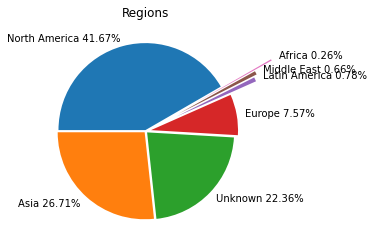

In [26]:
plt.figure()
l,x = list(zip(*top))
l = [f'{L} {X:.2f}%' for L,X in zip(l,x)]
plt.pie(x, labels=l, explode=[1/(2*v+1) for v in x], startangle=30) # 
plt.title(key.capitalize())
plt.savefig(str(root / f'{key}.png'))
pass

In [27]:
key = 'countries'

In [28]:
top = get_top(tbls[key], 15)
print(tabulate(top, headers=[key.capitalize(), 'Amount (%)']))

Countries         Amount (%)
--------------  ------------
United States      39.6596
Unknown            22.3517
China              17.9804
Japan               3.52282
Canada              2.00783
South Korea         1.91417
United Kingdom      1.4109
Germany             1.40001
Taiwan              1.09678
France              0.812983
India               0.802023
Switzerland         0.799447
Denmark             0.637565
Brazil              0.490058
Australia           0.439693
Other               4.67406


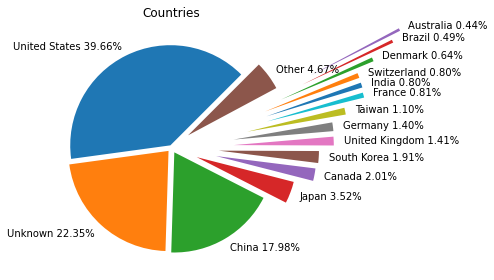

In [29]:
plt.figure()
l,x = list(zip(*top))
l = [f'{L} {X:.2f}%' for L,X in zip(l,x)]
plt.pie(x, labels=l, explode=[1/(v+.2) for v in x], startangle=45) # 
plt.title(key.capitalize())
plt.tight_layout()
plt.savefig(str(root / f'{key}.png'))
pass

In [30]:
key = 'sectors'

In [31]:
top = get_top(tbls[key], None)
print(tabulate(top, headers=[key.capitalize(), 'Amount (%)']))

Sectors                   Amount (%)
----------------------  ------------
Unknown                    24.0268
Information Technology     15.2665
Industrials                 9.84382
Financials                  9.69041
Consumer Discretionary      9.11724
Health Care                 7.47212
Communication Services      7.3588
Consumer Staples            4.41831
Utilities                   4.03151
Materials                   3.68209
Energy                      1.64758
Real Estate                 1.46254
Bonds                       1.00716
Commodity                   0.975152


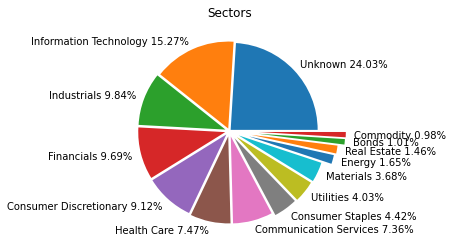

In [32]:
plt.figure()
l,x = list(zip(*top))
l = [f'{L} {X:.2f}%' for L,X in zip(l,x)]
plt.pie(x, labels=l, explode=[1/(2*v+1) for v in x], startangle=0) # 
plt.title(key.capitalize())
plt.savefig(str(root / f'{key}.png'))
pass

In [33]:
key = 'industry'

In [34]:
top = get_top(tbls[key], 49)
print(tabulate(top, headers=[key.capitalize(), 'Amount (%)']))

Industry                                          Amount (%)
----------------------------------------------  ------------
Unknown                                            24.0268
Software                                            5.34544
Banks                                               4.76398
Interactive Media & Services                        4.14663
Semiconductors & Semiconductor Equipment            3.87583
Electrical Equipment                                2.83101
Internet & Direct Marketing Retail                  2.80756
IT Services                                         2.28426
Beverages                                           2.25942
Entertainment                                       2.05964
Pharmaceuticals                                     1.99861
Automobiles                                         1.99583
Technology Hardware, Storage & Peripherals          1.94228
Capital Markets                                     1.92832
Biotechnology                          

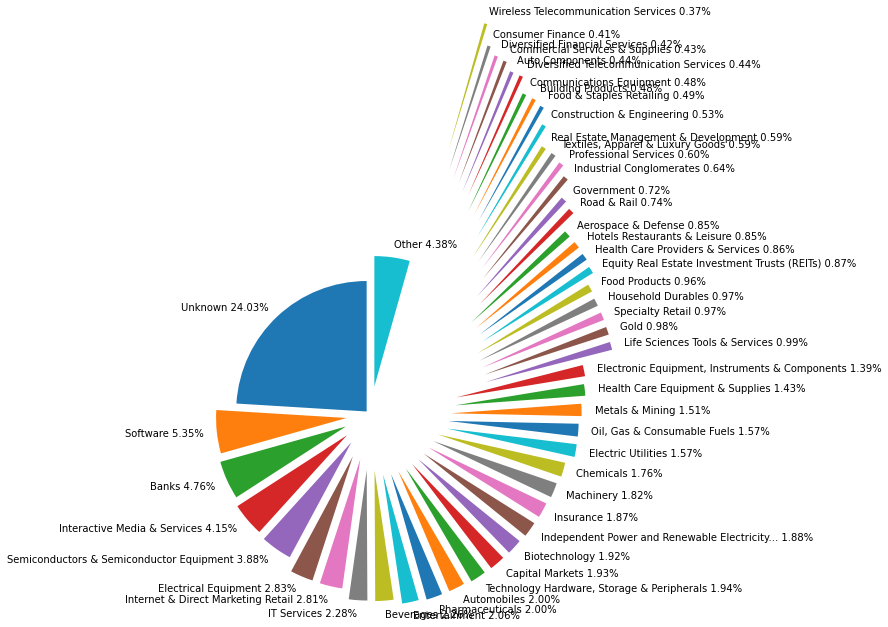

In [35]:
plt.figure(figsize=(6,6))
l,x = list(zip(*top))
l = [f'{L} {X:.2f}%' for L,X in zip(l,x)]
plt.pie(x, labels=l, explode=[1/(v+.1) for v in x], startangle=90)
# plt.title(key.capitalize())
plt.savefig(str(root / f'{key}.png'))
pass

In [36]:
# key = 'companies'

In [37]:
# top = get_top(tbls[key], 50)
# print(tabulate(top, headers=[key.capitalize(), 'Amount (%)']))

In [38]:
etfs['ARKK']

[['TSLA', 'Tesla Inc', 'United States', 0.10577884423115376],
 ['ROKU', 'Roku Inc Class A', 'United States', 0.06118776244751049],
 ['TDOC', 'Teladoc Health Inc', 'United States', 0.060287942411517685],
 ['SQ', 'Square Inc A', 'United States', 0.05128974205158967],
 ['ZM',
  'Zoom Video Communications Inc',
  'United States',
  0.049090181963607274],
 ['SHOP', 'Shopify Inc A', 'Canada', 0.04749050189962007],
 ['COIN',
  'Coinbase Global Inc Ordinary Shares - Class A',
  'United States',
  0.044091181763647264],
 ['U',
  'Unity Software Inc Ordinary Shares',
  'United States',
  0.04159168166366726],
 ['TWLO', 'Twilio Inc A', 'United States', 0.03919216156768646],
 ['SPOT', 'Spotify Technology SA', 'United States', 0.034393121375724846],
 ['Z', 'Zillow Group Inc C', 'United States', 0.02979404119176164],
 ['EXAS', 'Exact Sciences Corp', 'United States', 0.029194161167766443],
 ['CRSP', 'CRISPR Therapeutics AG', 'Switzerland', 0.025394921015796833],
 ['DOCU', 'DocuSign Inc', 'United Stat

In [39]:
{t:(len(rs), f'{sum(r[-1] for r in rs):.2g}') for t, rs in etfs.items()}

{'VONG': (460, '1'),
 'XITK': (97, '1'),
 'ICLN': (92, '1'),
 'ARKK': (46, '1'),
 'IXUS': (3129, '1'),
 'KWEB': (51, '1'),
 'EWG': (66, '1'),
 'IAGG': (3230, '1'),
 'MCHI': (605, '1'),
 'SKYY': (66, '1'),
 'CNYA': (475, '1'),
 'DIA': (31, '1'),
 'SCHP': (45, '1'),
 'ESPO': (27, '1'),
 'CIBR': (40, '1'),
 'SPY': (506, '1'),
 'PHO': (37, '1'),
 'LQD': (2390, '1'),
 'VXF': (2040, '1'),
 'LIT': (40, '1'),
 'IBB': (266, '1'),
 'EWY': (107, '1'),
 'FIDU': (346, '1'),
 'FLJP': (510, '1'),
 'FHLC': (437, '1'),
 'VTI': (1476, '1'),
 'EWC': (95, '1'),
 'EMXC': (614, '1'),
 'IAU': (1, '1'),
 'ACES': (48, '1'),
 'IGOV': (753, '1'),
 'FNCL': (385, '1'),
 'IWV': (1457, '1'),
 'VGK': (1126, '1'),
 'VGT': (322, '1'),
 'SPDW': (1864, '1'),
 'QQQ': (102, '1'),
 'ICVT': (334, '1'),
 'SOCL': (44, '1'),
 'ASHR': (298, '1'),
 'KOMP': (496, '1')}

In [40]:
sum(ratios.values())

0.9999999999999998

In [41]:
currency = {
    'Us Dollar': 'USD',
    'Cash†': 'USD',
    'Cashusd': 'USD',
    'Japanese Yen': 'JPY',
    'Polish Zloty': 'PLN',
    'British Pound Sterling': 'GBP',
    'Norwegian Krone': 'NOK',
    'Chinese Yuan': 'CNY',
    'Pound Sterling': 'GBP',
    'Euro Currency': 'EUR',
    'Canadian Dollar': 'CAD',
    'Swiss Franc': 'CHF',
    'Australian Dollar': 'AUD',
    'Euro': 'EUR',
    'Cash Collateral Eur Ubfut': 'EUR',
    'Hong Kong Dollar': 'HKD',
    'Futures Krw Margin Balance': 'KRW',
    'Cnh Cash': 'CNY',   
}
currency.update({f'{sym.capitalize()} Cash':sym for sym in CURRENCIES})

commodities = {'Gold'}

skippable = {'JFROG LTD COMMON STOCK',
 'State Street Institutional Liq State St Inst Liq Res Prem',
 'Ss Inst Treas Plus Mm Fund Tru Ss Inst Treas Plus Mm Fund Tru',
 'E-Mini Russ 2000 Mar21 Xcme 20210319',
 'Hirogin Holdings Inc Common Stock',
 'Ssc Government Mm Gvmxx',
 'Interest/Overdraft',
 'Ss Inst Treas Plus Mm Fund Tru Ss Inst Treas Plus Mm Fund Tru',
 'E-Mini Russ 2000 Mar21 Xcme 20210319',
 'Engie Loyalty Line 2021',
 'Edf (Electricie De France) Loyalty Line 2021',
 'BANCO SANTANDER SA (RTS NOV 2020)',
 'Seb Sa (Loyalty Line 2021) New',
 'AVEVA GROUP-NIL',
 'Interest/Overdraft',
 'AVIC SHENYANG AIRCRAFT CO -A',
 'SEAZEN HOLDINGS CO LTD-A',
 'SHENNAN CIRCUITS CO LTD-A',
 'BGI GENOMICS CO LTD-A',
 'SHENNAN CIRCUITS CO LTD-A',
 'State Street Institutional Liq State St Inst Liq Res Prem',
 'Siemens Energy Ag Common Stock',
 'Docebo Inc Common Stock Npv',
 'Adp Common Stock Eur3.0',
 'Lundbergs Ab B Shs Common Stock',
 'Befesa Sa Common Stock',
 'Ses Receipt',
 'Money Forward Inc Common Stock',
 'Kadokawa Corp Common Stock',
 'Schaeffler Ag Pref Preference',
 'Ss Inst Treas Plus Mm Fund Tru Ss Inst Treas Plus Mm Fund Tru',
 'E-Mini Russ 2000 Mar21 Xcme 20210319',
 'State Street Institutional Liq State St Inst Liq Res Prem',
 'BlackRock Cash Funds Treasury SL Agency',
 'BlackRock Cash Funds Treasury SL Agency',
 'FirstCash Inc',
 'BlackRock Cash Funds Treasury SL Agency',
 'Cash Collateral Usd Hbcft',
 'FirstCash Inc',
 'BlackRock Cash Funds Treasury SL Agency',
 'Cash Collateral Usd Ubfut',
 'BlackRock Cash Funds Treasury SL Agency',
 'Cash Collateral Msfut Usd',
 'FirstCash Inc',
 'Lancashire Holdings Ltd',
 'Cash Collateral Usd Hbcft',
 'BlackRock Cash Funds Treasury SL Agency',
 'Cash Collateral Usd Sgaft',
 'FirstCash Inc',
 'BlackRock Cash Funds Treasury SL Agency',
 'Cash Collateral Cad Ubfut',
 'BlackRock Cash Funds Treasury SL Agency',
 'BlackRock Cash Funds Treasury SL Agency',
 'BlackRock Cash Funds Treasury SL Agency',
 'Cash Collateral Usd Ubfut',
 'Metcash Ltd',
 'Lancashire Holdings Ltd',
 'Cash Collateral Usd Jpmsw',
 'BlackRock Cash Funds Treasury SL Agency',
 'John Deere Cash Management 0.5%',
 'John Deere Cash Management 2.2%',
 'Lancashire Holdings Ltd',}

aliases = {
    'NTDOY': '7974',
    'TCEHY': '00700',
}


In [42]:
assets = {}
known = set()
done_rats = set()
skip_it = []
    
for sec, rows in etfs.items():
    if sec in ratios and ratios[sec] > 0:
        r = ratios[sec]
        done_rats.add(sec)
        for row in rows:
            typ = 'Stocks'
            tk, name, land, q = row
            ticker = tk
            if name in commodities:
                typ = 'Commodity'
                ticker = None
                tk = name
                land = None
            if name in currency or tk == '-CASH-':
                if name in currency:
                    tk = currency[name]
                if tk in CURRENCIES:
                    name = CURRENCIES[tk]['name']
                    typ = 'Currency'
                    land = None
                elif name not in skippable:
                    print(sec, name)
                    
            if tk is None and sec == 'ICVT':
                tk = 'Convertible Bonds'
                typ = 'Convertible Bonds'
                name = 'Convertible Bonds'
                ticker = None
                land = None
                
            if tk is None and pies[sec]['Asset Classification'] == 'Fixed Income' or ' Treasury ' in name:
                tk = 'Bonds'
#                 if land is not None:
#                     tk = f'Bonds - {land}'
                typ = 'Bonds'
                name = 'Bonds'
                ticker = None
                land = None
            
            if tk is None:
#                 if name not in skippable:
#                     print(sec, name)
                tk = 'Unknown'
                typ = 'Unknown'
                name = 'Unknown'
                ticker = None
                land = None
            
            if tk not in assets:
                assets[tk] = {'name': name, 'ticker': ticker, 'amount': 0., 'country': land, 'type': typ}
            assets[tk]['amount'] += q * r
            
for tk, info in stocks.items():
    
    if tk in ratios and ratios[tk] > 0:
        r = ratios[tk]
        
        if tk in aliases:
            tk = aliases[tk]
        if tk not in assets:
            print(tk)
        else:
            assets[tk]['employees'] = info['employees']
            assets[tk]['eps'] = info['eps']
            assets[tk]['amount'] += r

# for tk, info in assets.items():
#     if tk != 'Unknown':
#         info['ticker'] = tk
            
skip_it

ICLN Cash Collateral Eur Hbcft
ESPO Stillfront Group Ab Common Stock Sek.07
SPY Usd
FIDU Xai Emini Industr Sep21 Xcme 20210917
FIDU E-Mini Russ 2000 Sep21 Xcme 20210917
FLJP NIKKEI 225 (OSE) SEP21 XOSE 20210909
FHLC Xav Health Care Sep21 Xcme 20210917
FHLC ORTHO CLINICAL DIAGNOSTICS H COMMON STOCK USD.00001
FHLC E-Mini Russ 2000 Sep21 Xcme 20210917
FNCL Xaf Financial Sep21 Xcme 20210917
FNCL E-Mini Russ 2000 Sep21 Xcme 20210917
VGK SILTRONIC-TEND
VGK Eurazeo Se (Loyalty Line 2023)
SPDW Aust And Nz Banking Group Common Stock
SPDW Relx Plc Common Stock Gbp.144397
SPDW Dnb Bank Asa Common Stock Nok12.5
SPDW Stellantis Nv Common Stock Eur.01
SPDW Swedish Match Ab Common Stock Sek1.9823
SPDW Nokia Oyj Common Stock Npv
SPDW Flutter Entertainment Plc Di Common Stock Eur.09
SPDW Sk Inc Common Stock Krw200.0
SPDW Nuvei Corp Subordinate Vtg Common Stock
SPDW Tilray Inc Class 2 Common Common Stock Usd.0001
SPDW Hybe Co Ltd Common Stock Krw500.0
SPDW Singapore Dollar
SPDW South Korean Won
SPDW Dif

[]

In [43]:
len(assets)

6647

In [44]:
set(ratios) - set(done_rats)

{'AAPL',
 'AMD',
 'AMZN',
 'BABA',
 'BIDU',
 'COST',
 'DIS',
 'FB',
 'GOOGL',
 'LI',
 'MSFT',
 'NFLX',
 'NIO',
 'NTDOY',
 'NVDA',
 'PDD',
 'PTON',
 'PYPL',
 'QCOM',
 'SHOP',
 'SONY',
 'TCEHY',
 'TSLA',
 'UBER',
 'XPEV',
 'YNDX'}

In [45]:
sum(a['amount'] for a in assets.values())

0.9999999999999651

In [46]:
assets['Unknown']

{'name': 'Unknown',
 'ticker': None,
 'amount': 0.003094901563511037,
 'country': None,
 'type': 'Unknown'}

In [47]:
assets['USD']

{'name': 'United States dollar',
 'ticker': '-CASH-',
 'amount': 0.0020795231114886406,
 'country': None,
 'type': 'Currency'}

In [48]:
breakdown = {}
for n, info in assets.items():
    typ = info['type']
    if typ not in breakdown:
        breakdown[typ] = 0.
    breakdown[typ] += info['amount']
breakdown

{'Stocks': 0.9411516174146453,
 'Currency': 0.00517717265151796,
 'Unknown': 0.003094901563511037,
 'Bonds': 0.010941151584937282,
 'Commodity': 0.0097515218771914,
 'Convertible Bonds': 0.02988363490816221}

In [49]:
sum(breakdown.values())

0.9999999999999651

In [50]:
# for n, info in assets.items():
#     if info['type'] == 'Currency':
#         print(n, info)

In [51]:
top = get_top(breakdown, None)
print(tabulate(top, headers=['Asset Type', 'Amount (%)']))

Asset Type           Amount (%)
-----------------  ------------
Stocks                94.1152
Convertible Bonds      2.98836
Bonds                  1.09412
Commodity              0.975152
Currency               0.517717
Unknown                0.30949


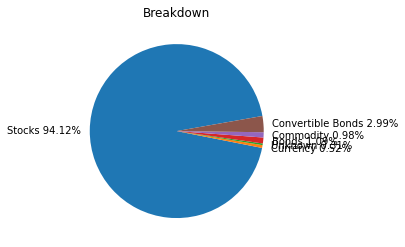

In [52]:
plt.figure()
l,x = breakdown.keys(), breakdown.values()
l = [f'{L} {X*100:.2f}%' for L,X in zip(l,x)]
objs, txt = plt.pie(x, labels=l, startangle=10) # explode=[1/(2*v+1) for v in x], 
# adjust_text(txt)
plt.title('Breakdown')
plt.savefig(str(root / 'breakdown.png'))
pass

In [53]:
full = dicts_to_table(assets, cols=['name', 'ticker', 'country', 'amount'], sort_by='amount', reverse=True, 
                      ignore_key=True, skip_header=True)
for row in full:
    row[-1] *= 100


In [54]:
num = 49
# num = None

if num is None:
    top = full.copy()
else:
    top = full[:num]
    if len(full) > num:
        n = len(top[0])-2
        top.append(['Other'] + [None]*n + [sum(x[-1] for x in full[num:])])
    
csv = []

for line in top:
    row = [('' if x is None else x) for x in line]
#     row[-1] = f'{row[i]/100:.4f}'
    row[-1] = f'{row[-1]:.2f}%'
    csv.append(','.join(row))
    
headers = ['Name', 'Ticker', 'Country', 'Amount']
with (root/'companies.csv').open('w', encoding='utf-8') as f:
    f.write(','.join(headers) + '\n')
    f.write('\n'.join(csv))
    f.write('\n')

In [55]:
print(tabulate(top, headers=headers))

Name                                        Ticker    Country           Amount
------------------------------------------  --------  -------------  ---------
NVIDIA Corp                                 NVDA      United States   3.70263
Convertible Bonds                                                     2.98836
Advanced Micro Devices Inc                  AMD       United States   2.46527
Microsoft Corp                              MSFT      United States   2.41926
Tesla Inc                                   TSLA      United States   2.12416
Amazon.com Inc                              AMZN      United States   1.76833
Tencent Holdings Ltd                        00700     China           1.66856
Apple Inc                                   AAPL      United States   1.60655
Costco Wholesale Corp                       COST      United States   1.32024
Alphabet Inc Class A                        GOOGL     United States   1.2601
Facebook Inc Class A                        FB        United St